In [11]:
%load_ext autoreload
%autoreload 2
%load_ext jupyternotify
import numpy as np 
from sets import Set
from conf_ope_rl import * 




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The jupyternotify extension is already loaded. To reload it, use:
  %reload_ext jupyternotify


[nan, nan, -0.10221967955108995, -0.07437043647580127, -0.08054558480710156, -0.08354065743034209, -0.08005107601278247, -0.07762334375977488, -0.07755137373393846, -0.07736409822472194]


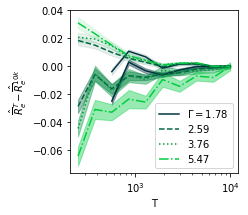

In [86]:
plt.figure(figsize=(3,3))
# for ind_enn, enn in enumerate(nns): 
import glob
import pickle
files = glob.glob('output-log*.p')
min_bnds__ = [None] * len(files); max_bnds__ = [None] * len(files)
linestyles = ['dashed', 'solid', 'dashed', 'dotted', 'dashdot']
for ind,f_ in enumerate(files): 
    [min_bnds,max_bnds, nns, logGams_full] = pickle.load(open(f_,'rb'))
    min_bnds__[ind] = min_bnds; max_bnds__[ind] = max_bnds


for ind_gam, gam in enumerate(logGams_full[1:]):
    ind_gam = ind_gam +1
    color=(0.,(ind_gam)*1.0/(len(logGams_full)),0.25)
    means = [np.mean([min_bnds__[i][enn][ind_gam] for i in range(len(files)) if min_bnds__[i][enn][ind_gam] !=None ]) for enn in range(len(nns))]
    last = np.mean([min_bnds__[i][-1][ind_gam] for i in range(len(files)) if min_bnds__[i][enn][ind_gam] !=None ])
    stdev = [np.std([min_bnds__[i][enn][ind_gam] for i in range(len(files)) if min_bnds__[i][enn][ind_gam] !=None ]) for enn in range(len(nns))]
    n = len([min_bnds__[i][enn][ind_gam] for i in range(len(files)) if min_bnds__[i][enn][ind_gam] !=None ])
    if ind_gam == 1: 
        print means
        plt.plot( nns, means-last, linestyle = linestyles[ind_gam], color=color, label = r'$\Gamma=$'+str(np.round(np.exp(gam),2)))
    else:
        plt.plot( nns, means-last, linestyle = linestyles[ind_gam], color=color, label = np.round(np.exp(gam),2))
    plt.fill_between( nns, means - last - stdev/np.sqrt(n), means - last + stdev/np.sqrt(n), alpha = 0.4, color = color)

    means = [np.mean([max_bnds__[i][enn][ind_gam] for i in range(len(files)) if min_bnds__[i][enn][ind_gam] !=None ]) for enn in range(len(nns)) ]
    last = np.mean([max_bnds__[i][-1][ind_gam] for i in range(len(files)) if min_bnds__[i][enn][ind_gam] !=None ])
    stdev = [np.std([max_bnds__[i][enn][ind_gam] for i in range(len(files)) if min_bnds__[i][enn][ind_gam] !=None ]) for enn in range(len(nns))]
    n = len([max_bnds__[i][enn][ind_gam] for i in range(len(files)) if min_bnds__[i][enn][ind_gam] !=None ])
    plt.plot( nns, means-last, linestyle = linestyles[ind_gam], color=color)
    plt.fill_between( nns, means - last - stdev/np.sqrt(n), means - last + stdev/np.sqrt(n), alpha = 0.1, color = color)

plt.ylabel(r'$\hat{\overline{R}}_e^T - \hat{\overline{R}}_e^{10k}$')
plt.xscale('log')
plt.legend()
plt.xlabel('T')
plt.savefig('../figs/consistency-gridworld.pdf',bbox_inches='tight')